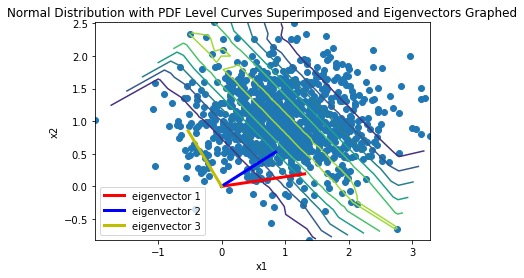

In [19]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.ticker as ticker
import statsmodels.formula.api as smf
from scipy.stats import linregress
from scipy import stats
from skimage.measure import LineModelND, ransac
import random as rand
from numpy.linalg import inv
import math
from numpy.random import randn


##2b

matrix1 = np.array([1, -0.5])
matrix2 = np.array([-0.5,0.5])

                  
#find stdev of matricies
sdev1 = np.std(matrix1)
sdev2 = np.std(matrix2)


#mean for both stdev of matrix
matrix_no_t = np.array([1,1])
matrix_t = np.transpose(matrix_no_t)
mean = np.mean(matrix_t)


#Generate 1000 random normally distributed samples of [x1,x2]
x1 = np.random.normal(loc = mean, scale = sdev1, size = 1000)
x2 = np.random.normal(loc = mean, scale = sdev2, size = 1000)


#plot x1 and x2 in scatter plot
plt.scatter(x1, x2)

#superimposing eigenvectors
#finding eigenvectors of matrix1
matrix_comb = np.array([[1, -0.5],[-0.5,0.5]])
eigenv = eig(matrix_comb)


#plotting 3 eigenvectors
plt.plot([0, eigenv[0][0]], [0, eigenv[0][1]], color = "r", linewidth = 3, label = 'eigenvector 1')
plt.plot([0, eigenv[1][0][0]], [0, eigenv[1][0][1]], color = "b", linewidth = 3, label = 'eigenvector 2')
plt.plot([0, eigenv[1][1][0]], [0, eigenv[1][1][1]], color = "y", linewidth = 3, label = 'eigenvector 3')



#superimpose PDF level curve ... 
x1n2 = x1 + x2
p_x = x1
p_y = x2

sdev = np.std(matrix_comb)
x_mean = sum(x1n2) / len(x1n2)


#doing PDF math based on given formula (searched it online)

frac = 1/np.sqrt(2 * math.pi * sdev)
frac_in_exp = (-(x1n2 - x_mean)**2)/(2*sdev**2)
exp = np.exp(frac_in_exp)

p_z = frac * exp

#build level curve
plt.tricontour(p_x, p_y, p_z)

plt.title('Normal Distribution with PDF Level Curves Superimposed and Eigenvectors Graphed')
plt.xlabel('x1')
plt.ylabel('x2')

plt.legend()
plt.show()

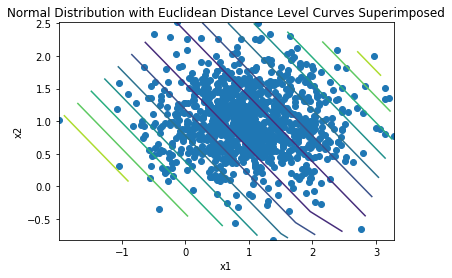

In [23]:
#2c

#calculate Euclidean distance

#calculate mean of x1 and x2
x1n2 = x1 + x2
x_mean = sum(x1n2) / len(x1n2)

#euclidean distance
e_x = x1
e_y = x2

#doing euclidean distance math based on given formula
e_z = abs(x1n2 - x_mean)


#build level curve
plt.tricontour(e_x, e_y, e_z)
plt.scatter(e_x, e_y)

plt.title('Normal Distribution with Euclidean Distance Level Curves Superimposed')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

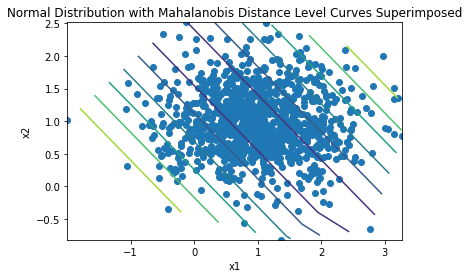

In [22]:
#2d
#calculate Mahalanobis distance

#inverse matrix 
inv_mat = inv(matrix_comb)
#standard deviation
sdev_inv = np.std(inv_mat)

#calculate x - mean
x1n2 = x1 + x2
x_mean = sum(x1n2) / len(x1n2)

sub_x_mean = x1n2 - x_mean


#Mahalanobis distance (z)
m_x = x1
m_y = x2

#doing Mahalanobis distance math based on given formula
m_z = np.sqrt(sub_x_mean * sdev_inv * sub_x_mean)

#build level curve
plt.tricontour(m_x, m_y, m_z)
plt.scatter(m_x, m_y)

plt.title('Normal Distribution with Mahalanobis Distance Level Curves Superimposed')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

Ideal lambda is 0.1


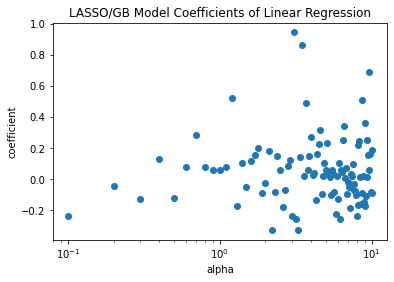

In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import seaborn as sns

#3a

#Grad Descent Algo

#loss function
def Loss(y,ypred):
    l=(y-ypred)**2
    return(l.sum())

#gradient descent function

def GradDesc(X, Y, learning_rate, trials, regularization):
    global cacheLoss
    cacheLoss=[None] * trials
    
    Weights=np.random.rand(X.shape[1])
    
    Weights=np.array(Weights)
    Weights=Weights.reshape(-1,1)
    m=X.shape[0]
    
    for i in range(trials):
        
        predictions=np.matmul(X, Weights)
        cacheLoss[i]=Loss(Y,predictions)
        
        Weights[0]=Weights[0]-(1/m)*learning_rate*(np.matmul(X[:,0].transpose(),predictions-Y))
        
        for j in range(1,len(Weights)):
            
            Weights[j]=Weights[j]-(1/m)*learning_rate*(np.matmul(X[:,j].transpose(),predictions-Y)+sum(np.dot(Weights[j],regularization)))
    return(Weights)
        


#load in samples
hw3 = loadmat('HW1_3.mat')

x_train = hw3['X']
y_train = hw3['Y']

x_test = hw3['X_test']
y_test = hw3['Y_test']




#turn into numpy
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)





#Lasso to generate lambda (lowest MSE on data)

bestMSE = 10e100
alphaList_L = [l*0.1 for l in range(1,102)]


for i in alphaList_L:
    lassoModel = Lasso (alpha = i, max_iter = 5000, fit_intercept = False)

    lassoModel.fit(x_train,y_train)

    getPred = lassoModel.predict(x_train).reshape(-1,1)

    MSE = sum((y_test-getPred)**2)

    if MSE < bestMSE:
        bestMSE = MSE
        lassoLambda = i


print(f'Ideal lambda is {lassoLambda}')


#get coefficients with Gradient Descent with learning rate of 5e-3 and 10000 gradient updates and LASSO regularization

addBias=np.ones([x_train.shape[0],1])
x_train=np.append(addBias,x_train,axis=1)

coefficients_L = GradDesc(x_train, y_train, learning_rate = 5e-3, trials = 10000, regularization = lassoLambda)

#plotting coefficients
ax = plt.gca()

ax.scatter(alphaList_L, coefficients_L)
ax.set_xscale('log')

plt.title('LASSO/GB Model Coefficients of Linear Regression')
plt.xlabel('alpha')
plt.ylabel('coefficient')

plt.axis('tight')
plt.show()

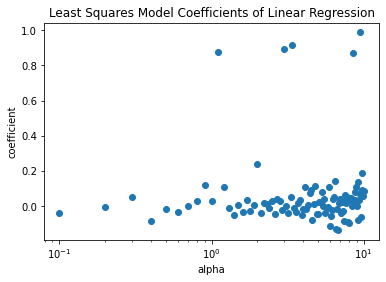

In [28]:
from sklearn import linear_model

#3b

#Train linear model
alphaList_ls = [l*0.1 for l in range(1,101)]

t = linear_model.LinearRegression()
x_delete_train = np.delete(x_train, 0, 1) #reshape/delete 1. column so we can match train and test sets

model = t.fit(x_delete_train, y_train)

#model coefficients
coefficients_ls = model.coef_


#plot coefficients

ax = plt.gca()

ax.scatter(alphaList_ls, coefficients_ls)
ax.set_xscale('log')

plt.title('Least Squares Model Coefficients of Linear Regression')
plt.xlabel('alpha')
plt.ylabel('coefficient')

plt.axis('tight')
plt.show()

In [29]:
#3c

#Lasso

#MSE on test data
#best y predcitions from LASSO
Y_pred_Lasso = lassoModel.predict(x_test).reshape(-1,1)
Y_true_Lasso = y_test

MSE_Lasso = np.square(np.subtract(Y_true_Lasso, Y_pred_Lasso)).mean()

#Least Squares

#MSE on test data
#best y predictions from LS
intercept = model.intercept_
slope = model.coef_

for i in range(len(x_test)): #y = mx+b
    Y_pred_LS = intercept + slope * x_test[i]
Y_true_LS = y_test

MSE_LS = np.square(np.subtract(Y_true_LS, Y_pred_LS)).mean()


print(f"The mean square error on test set (true vs predicted output) for LASSO is {MSE_Lasso} compared to {MSE_LS} for least squares ... hence as LASSO produces a lower MSE, it is a model with better fit")




The mean square error on test set (true vs predicted output) for LASSO is 6.252351768583674 compared to 8.086017848092585 for least squares ... hence as LASSO produces a lower MSE, it is a model with better fit


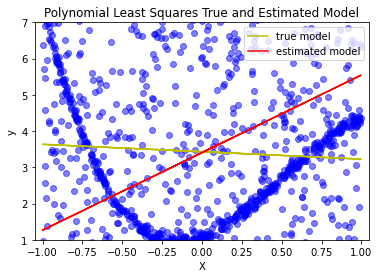

In [30]:
#4a

#using 1000 samples

#load in samples
hw4 = loadmat('HW1_4.mat')
hw4.keys() #check data

xdict = hw4['X']
ydict = hw4['Y']
alpha = hw4['alpha']

#convert dict to np.array
xlist = list(xdict)
ylist = list(ydict)
X = np.array(xlist)
ytrue = np.array(ylist)

#change to 1D arrays to plot
X_1D = X[:,0]
ytrue_1D = ytrue[:,0]

e = np.random.normal(loc = 0, scale = 0.01) #gaussian noise

#added gausian noise
ytrue_1D = ytrue_1D + e
degree = 3

#plot samples
plt.scatter(X_1D, ytrue_1D, color = 'b', alpha = 0.5)

#plot true model
slope, intercept, r_value, p_value, std_err = stats.linregress(X[:,0], ytrue[:,0])
#mtrue = linregress(x, ytrue) #to find slope mtrue[0] and intercept mtrue[1] of true
plt.plot(X_1D, slope*X_1D + intercept, '-y', label = 'true model') #plotting y = mx+b

#estimated model with poly least squares (polyfit)

polyfit = np.polyfit(X_1D, ytrue_1D, degree)
yestimate = -polyfit[0]*X**3 + polyfit[1]*X**2 + polyfit[2]*X + polyfit[3]
mest = stats.linregress(X[:,0], yestimate[:,0])

#plot estimated model
plt.plot(X_1D, mest[0]*X_1D + mest[1], '-r', label = 'estimated model')

plt.title('Polynomial Least Squares True and Estimated Model')
plt.xlabel('X')
plt.ylabel('y')

plt.axis([-1.05, 1.05, 1, 7])
plt.legend()
plt.show()

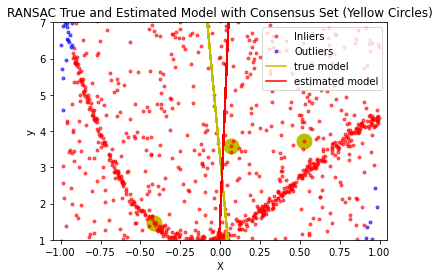

In [33]:
#4b

#combine X and ytrue

data = np.column_stack([X_1D,ytrue_1D])

#fit line using all data
model = LineModelND()
model.estimate(data)

#implement RANSAC with fitted line data to get model_r
model_r, inliers = ransac(data, LineModelND, min_samples = 2, residual_threshold = 1, max_trials = 1000)
outliers = inliers == False #separate out the outliers from inliers

#generate coordinates
ytrue= model.predict_y(X_1D)
yestimate = model_r.predict_y(X_1D)


#finding consensus set
randset = []
con = [] #consensus set
inliers_count = 0

loop = 5


for i in range(loop): #tried my best on this consensus set implementation
    randset.append(data[rand.randint(0, 1000)])

    if randset[i][1] - ytrue[i]  <= 0.3: #threshold
        con.append(randset[i]) 
        if data[inliers][i][0] == randset[i][0] and data[inliers][i][1]== randset[i][1]:
            inliers_count+=1
    if len(con) > 0:
        if inliers_count/len(con) * 100 > 40: #inliers exceed 40%
            break
    else:
        continue
            
            
    loop+=1    
    
                    

#plotting consensus set
for i in range(len(con)):
    con_set = plt.plot(con[i][0], con[i][1], '.y', alpha=1, markersize = 30) #consensus set
    
    
plt.plot(data[inliers, 0], data[inliers, 1], '.r', alpha=0.6, label = 'Inliers') #inliers
plt.plot(data[outliers, 0], data[outliers, 1], '.b', alpha=0.6, label = 'Outliers')#outliers

plt.plot(X_1D, ytrue, '-y', label='true model')
plt.plot(X_1D, yestimate, '-r', label='estimated model')

plt.title('RANSAC True and Estimated Model with Consensus Set (Yellow Circles)')
plt.xlabel('X')
plt.ylabel('y')

plt.axis([-1.05, 1.05, 1, 7])
plt.legend()
plt.show()
